# London Area Suitability Software

## Project Summary:

As London's population continues to grow, with a projected increase of 8.289% by 2035("https://www.macrotrends.net/global-metrics/cities/22860/london/population"), the challenge of finding suitable housing in an unfamiliar part of the city becomes increasingly daunting for many prospective movers. The decision-making process is relatively straightforward when looking for a new home close to one's current residence; however, relocating to a different part of town, moving across the country, or purchasing a second home presents a more complex set of challenges. Gaining a deep understanding of a new area to determine if it aligns with one’s living preferences requires time and effort, and important local nuances often go unnoticed during brief visits.

Furthermore, the UK's housing market is distinctly localized, making it crucial to meticulously research individual neighborhoods and streets to avoid costly mistakes. This need becomes even more pressing when quick decisions are required in competitive housing situations.

To address these challenges, I developed an Area Recommender tool. Utilizing [model], this tool analyzes [number] different features to streamline the process of finding an ideal area in London for buying or renting property. This solution significantly simplifies the search for a new home, allowing users to make informed decisions efficiently and confidently.

## Introduction

### Objective:

The primary objective of the Area Recommender tool is to simplify and accelerate the process of finding a suitable area in London to live, whether for renting or buying property. By leveraging advanced predictive modeling, the tool aims to provide personalized area recommendations that align with user preferences and requirements.

### Problem Statement:

As London’s population is projected to increase significantly by 2035, the demand for housing in areas unfamiliar to prospective residents is growing. Navigating the highly localized UK housing market and making quick, well-informed decisions is essential due to the competitive nature of real estate transactions. The challenge lies in efficiently gathering and analyzing extensive local information to avoid potential missteps in the housing search process.

### Stakeholders:

The primary stakeholders of this project include:

Prospective Homebuyers and Renters - Individuals or families looking for new homes either within different parts of London or from outside the city.

Real Estate Agents - Professionals who could use the tool to provide better recommendations to their clients, enhancing customer satisfaction and efficiency.

Property Developers - Firms that could benefit from understanding area preferences to better target their developments according to market demands.

Local Authorities - Government bodies interested in monitoring housing demand trends and planning resources accordingly.
By addressing the specific needs of these stakeholders, the Area Recommender tool enhances the decision-making process for all parties involved in the London housing market.

## Gathering Data

In order to create a dataset that displays statistics of what users are looking for when buing a house, I gathered 4 different dataset that showcases data of the London borough's profile. The datasets include information such as child's qualification status, crime rates, property prices, etc.

The dataset is created from:
Crime Rate Dataset: https://crimerate.co.uk/london
London Borough Profile Dataset: https://trustforlondon.org.uk/data/boroughs/overview-of-london-boroughs/
London Well-being Dataset: https://data.london.gov.uk/dataset/london-wellbeing-and-sustainability-measure
London House Price Data: https://data.london.gov.uk/dataset/average-house-prices



In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("London_borough.csv")

In [132]:
df

,Area,Poverty rate,Income deprivation (relative to London overall),Median rent as a percentage of median pay,People seen sleeping rough by outreach,Proportion of borough residents' jobs that are low paid,Unemployment rate,19 year olds without level 3 qualifications,Percentage of pupils who achieved grade 9-4,crime rates,...,Healthy Life Expentency,Good Mental Illness - adult,Good Mental Health Children,Green Space,Air Quality,Carbon Emission,Energy Efficiency,Waste reduction,Being Ready for School,Good Qualification 16+
0,Barking and Dagenham,29.0,1.90,36.5,139.0,24.6,6.8,34.7,66.0,123.0,...,59.13,0.65,16693.70,0.38,0.25,10.49,0.62,0.27,62.5,49.3
1,Barnet,26.0,0.77,43.1,166.0,18.9,5.4,21.7,80.1,91.0,...,64.99,0.60,27921.07,0.52,0.25,11.36,0.57,0.29,64.9,58.1
2,Bexley,26.0,0.70,33.2,92.0,16.7,4.9,37.3,69.4,84.0,...,65.17,0.62,31506.15,0.37,0.25,11.14,0.51,0.50,69.2,52.3
3,Brent,32.0,1.11,43.1,373.0,23.3,5.7,28.0,68.0,114.0,...,65.58,0.57,26653.12,0.39,0.25,10.11,0.60,0.33,65.7,52.4
4,Bromley,17.0,0.58,38.1,92.0,14.0,5.0,32.6,73.2,88.0,...,67.53,0.55,19268.83,0.49,0.25,12.08,0.47,0.45,71.9,53.9
5,Camden,41.0,1.18,57.2,719.0,12.2,4.9,25.2,67.9,109.0,...,65.68,0.50,26736.21,0.44,0.25,11.07,0.63,0.29,65.3,52.4
6,City of London,26.0,1.01,36.5,373.0,16.3,5.3,33.3,64.5,29.0,...,NaN,NaN,36527.11,0.07,0.24,13.98,0.61,0.30,66.7,NaN
7,Croydon,34.0,1.00,44.1,563.0,19.8,4.9,23.2,73.7,109.0,...,62.83,0.56,15564.18,0.47,0.25,11.53,0.55,0.41,67.4,47.6
8,Ealing,33.0,1.49,37.3,219.0,22.8,5.6,34.8,65.7,105.0,...,63.34,0.57,20522.10,0.41,0.25,10.55,0.63,0.49,68.0,53.7
9,Enfield,21.0,1.26,48.9,196.0,14.2,4.4,35.2,66.3,106.0,...,63.18,0.61,27412.02,0.43,0.25,10.87,0.45,0.33,65.4,48.6


In [133]:
df.set_index('Area', inplace=True)

In [134]:
df.columns

Index(['Poverty rate', 'Income deprivation (relative to London overall)',
       'Median rent as a percentage of median pay',
       'People seen sleeping rough by outreach',
       'Proportion of borough residents' jobs that are low paid',
       'Unemployment rate', '19 year olds without level 3 qualifications',
       'Percentage of pupils who achieved grade 9-4', 'crime rates',
       'average property price 2024 Feb', 'Fair pay (London Living Wage) ',
       'Job Satisfaction', 'Bills are paid in time', 'Healthy Life Expentency',
       'Good Mental Illness - adult', 'Good Mental Health Children',
       'Green Space', 'Air Quality', 'Carbon Emission', 'Energy Efficiency',
       'Waste reduction', 'Being Ready for School', 'Good Qualification 16+'],
      dtype='object')

In [135]:
df = df.rename(columns={
    'Poverty rate': 'PovertyRate',
    'Income deprivation (relative to London overall)': 'IncomeDeprivation',
    'Median rent as a percentage of median pay': 'RentToPayRatio',
    'People seen sleeping rough by outreach': 'SleepingRoughCount',
    'Proportion of borough residents\' jobs that are low paid': 'LowPaidJobsRate',
    'Unemployment rate': 'UnemploymentRate',
    '19 year olds without level 3 qualifications': 'Under19NoLevel3',
    'Percentage of pupils who achieved grade 9-4': 'PupilsGrade9To4',
    'crime rates': 'CrimeRates',
    'average property price 2024 Feb': 'AvgPropertyPriceFeb2024',
    'Fair pay (London Living Wage) ': 'LondonLivingWage',
    'Job Satisfaction': 'JobSatisfaction',
    'Bills are paid in time': 'TimelyBillPayment',
    'Healthy Life Expentency': 'HealthyLifeExpectancy',
    'Good Mental Illness - adult': 'AdultMentalWellness',
    'Good Mental Health Children': 'ChildMentalHealth',
    'Green Space': 'GreenSpace',
    'Air Quality': 'AirQuality',
    'Carbon Emission': 'CarbonEmission',
    'Energy Efficiency': 'EnergyEfficiency',
    'Waste reduction': 'WasteReduction',
    'Being Ready for School': 'SchoolReadiness',
    'Good Qualification 16+': 'Qualification16Plus'
})

df.head()

,PovertyRate,IncomeDeprivation,RentToPayRatio,SleepingRoughCount,LowPaidJobsRate,UnemploymentRate,Under19NoLevel3,PupilsGrade9To4,CrimeRates,AvgPropertyPriceFeb2024,...,HealthyLifeExpectancy,AdultMentalWellness,ChildMentalHealth,GreenSpace,AirQuality,CarbonEmission,EnergyEfficiency,WasteReduction,SchoolReadiness,Qualification16Plus
Area,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,29.0,1.90,36.5,139.0,24.6,6.8,34.7,66.0,123.0,328226.0,...,59.13,0.65,16693.70,0.38,0.25,10.49,0.62,0.27,62.5,49.3
Barnet,26.0,0.77,43.1,166.0,18.9,5.4,21.7,80.1,91.0,583647.0,...,64.99,0.60,27921.07,0.52,0.25,11.36,0.57,0.29,64.9,58.1
Bexley,26.0,0.70,33.2,92.0,16.7,4.9,37.3,69.4,84.0,391250.0,...,65.17,0.62,31506.15,0.37,0.25,11.14,0.51,0.50,69.2,52.3
Brent,32.0,1.11,43.1,373.0,23.3,5.7,28.0,68.0,114.0,521609.0,...,65.58,0.57,26653.12,0.39,0.25,10.11,0.60,0.33,65.7,52.4
Bromley,17.0,0.58,38.1,92.0,14.0,5.0,32.6,73.2,88.0,505297.0,...,67.53,0.55,19268.83,0.49,0.25,12.08,0.47,0.45,71.9,53.9


In [170]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate min and max values for each column
min_values = df[numeric_columns].min()
max_values = df[numeric_columns].max()

In [171]:
# Generate random preferences
random_preferences = np.random.rand(len(numeric_columns)) * (max_values - min_values) + min_values

In [176]:
# Generate random preferences for 5 users
num_users = 5
random_preferences_matrix = np.random.rand(num_users, len(numeric_columns)) * (max_values - min_values).values + min_values.values

# Print the random preferences for each user
for i, prefs in enumerate(random_preferences_matrix, start=1):
    print(f"User {i} Preferences: {np.round(prefs,2)}")

User 1 Preferences: [2.1910000e+01 7.5000000e-01 7.2810000e+01 1.1009200e+03 1.5870000e+01
 4.5000000e+00 3.3040000e+01 7.3130000e+01 8.2480000e+01 3.3085989e+05
 7.8290000e+01 8.7000000e-01 8.1000000e-01 6.5530000e+01 4.4000000e-01
 2.9951290e+04 3.2000000e-01 2.4000000e-01 1.3390000e+01 7.8000000e-01
 4.2000000e-01 6.1910000e+01 5.3560000e+01]
User 2 Preferences: [3.367000e+01 1.390000e+00 5.440000e+01 2.680400e+02 1.098000e+01
 4.920000e+00 2.255000e+01 7.950000e+01 1.324700e+02 7.709827e+05
 8.008000e+01 8.100000e-01 9.100000e-01 6.747000e+01 4.600000e-01
 2.326782e+04 1.600000e-01 2.400000e-01 1.393000e+01 4.700000e-01
 3.900000e-01 7.350000e+01 5.823000e+01]
User 3 Preferences: [3.27800000e+01 7.90000000e-01 7.39100000e+01 9.52900000e+02
 2.18100000e+01 6.64000000e+00 2.96200000e+01 8.08300000e+01
 8.68300000e+01 1.00188874e+06 8.11200000e+01 7.40000000e-01
 8.30000000e-01 6.41300000e+01 6.60000000e-01 2.78624600e+04
 7.00000000e-02 2.50000000e-01 1.19500000e+01 7.90000000e-01
 4

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PovertyRate              32 non-null     float64
 1   IncomeDeprivation        33 non-null     float64
 2   RentToPayRatio           33 non-null     float64
 3   SleepingRoughCount       33 non-null     float64
 4   LowPaidJobsRate          32 non-null     float64
 5   UnemploymentRate         32 non-null     float64
 6   Under19NoLevel3          32 non-null     float64
 7   PupilsGrade9To4          32 non-null     float64
 8   CrimeRates               33 non-null     float64
 9   AvgPropertyPriceFeb2024  33 non-null     float64
 10  LondonLivingWage         31 non-null     float64
 11  JobSatisfaction          33 non-null     float64
 12  TimelyBillPayment        33 non-null     float64
 13  HealthyLifeExpectancy    32 non-null     float64
 14  Adult

In [138]:
df.describe()

,PovertyRate,IncomeDeprivation,RentToPayRatio,SleepingRoughCount,LowPaidJobsRate,UnemploymentRate,Under19NoLevel3,PupilsGrade9To4,CrimeRates,AvgPropertyPriceFeb2024,...,HealthyLifeExpectancy,AdultMentalWellness,ChildMentalHealth,GreenSpace,AirQuality,CarbonEmission,EnergyEfficiency,WasteReduction,SchoolReadiness,Qualification16Plus
count,32.000000,33.000000,33.000000,33.000000,32.000000,32.000000,32.000000,32.000000,33.000000,3.300000e+01,...,32.000000,32.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000
mean,26.937500,1.059394,46.484848,319.666667,16.012500,5.021875,28.996875,71.225000,105.060606,5.553817e+05,...,64.338750,0.575625,26065.813636,0.403333,0.249091,11.187879,0.586667,0.333333,67.757576,52.812500
std,7.560242,0.418591,10.888128,355.835783,4.188752,0.748648,5.119632,5.570255,23.357198,1.771979e+05,...,2.529967,0.058029,5660.706977,0.082146,0.002919,0.912917,0.078209,0.081151,3.046518,3.719326
min,11.000000,0.420000,32.300000,30.000000,9.700000,3.800000,20.000000,61.000000,29.000000,3.282260e+05,...,59.130000,0.440000,15564.180000,0.070000,0.240000,9.160000,0.450000,0.190000,60.500000,46.300000
25%,22.000000,0.700000,38.100000,139.000000,12.175000,4.475000,25.175000,66.225000,91.000000,4.452460e+05,...,62.795000,0.547500,23224.460000,0.380000,0.250000,10.550000,0.530000,0.280000,65.700000,49.875000
50%,26.500000,1.000000,44.100000,219.000000,16.500000,4.900000,28.650000,71.250000,107.000000,5.052970e+05,...,64.055000,0.570000,26653.120000,0.410000,0.250000,11.140000,0.580000,0.320000,68.000000,52.500000
75%,32.250000,1.390000,52.200000,373.000000,19.525000,5.325000,33.150000,74.275000,119.000000,5.895170e+05,...,65.702500,0.612500,30196.440000,0.450000,0.250000,11.630000,0.630000,0.370000,69.600000,54.050000
max,43.000000,2.030000,75.400000,2050.000000,24.600000,7.000000,37.300000,82.500000,142.000000,1.154639e+06,...,69.550000,0.710000,36527.110000,0.520000,0.250000,13.980000,0.800000,0.500000,74.400000,61.000000


In [139]:
#See for any missing values in the dataset
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total= df_merged.isnull().sum().sort_values(ascending=False) #sorting the data
percent=(df_merged.isnull().sum()/df_merged.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percentage
Fair pay (London Living Wage),2,6.060606
Poverty rate,1,3.030303
Unemployment rate,1,3.030303
Good Mental Illness - adult,1,3.030303
Healthy Life Expentency,1,3.030303
19 year olds without level 3 qualifications,1,3.030303
Percentage of pupils who achieved grade 9-4,1,3.030303
Proportion of borough residents' jobs that are low paid,1,3.030303
Good Qualification 16+,1,3.030303
Green Space,0,0.000000


Using K nearest neighbour to impute the numbers

In [140]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)

imputed_data = imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# Add the area column back to the DataFrame
imputed_df['Area'] = areas

cols = ['Area'] + [col for col in imputed_df.columns if col != 'Area']
imputed_df = imputed_df[cols]

imputed_df = imputed_df.set_index('Area')
imputed_df

,PovertyRate,IncomeDeprivation,RentToPayRatio,SleepingRoughCount,LowPaidJobsRate,UnemploymentRate,Under19NoLevel3,PupilsGrade9To4,CrimeRates,AvgPropertyPriceFeb2024,...,HealthyLifeExpectancy,AdultMentalWellness,ChildMentalHealth,GreenSpace,AirQuality,CarbonEmission,EnergyEfficiency,WasteReduction,SchoolReadiness,Qualification16Plus
Area,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,29.000000,1.90,36.5,139.0,24.600000,6.800000,34.700000,66.0,123.0,328226.0,...,59.13,0.65,16693.70,0.38,0.25,10.49,0.62,0.27,62.5,49.300000
Barnet,26.000000,0.77,43.1,166.0,18.900000,5.400000,21.700000,80.1,91.0,583647.0,...,64.99,0.60,27921.07,0.52,0.25,11.36,0.57,0.29,64.9,58.100000
Bexley,26.000000,0.70,33.2,92.0,16.700000,4.900000,37.300000,69.4,84.0,391250.0,...,65.17,0.62,31506.15,0.37,0.25,11.14,0.51,0.50,69.2,52.300000
Brent,32.000000,1.11,43.1,373.0,23.300000,5.700000,28.000000,68.0,114.0,521609.0,...,65.58,0.57,26653.12,0.39,0.25,10.11,0.60,0.33,65.7,52.400000
Bromley,17.000000,0.58,38.1,92.0,14.000000,5.000000,32.600000,73.2,88.0,505297.0,...,67.53,0.55,19268.83,0.49,0.25,12.08,0.47,0.45,71.9,53.900000
Camden,41.000000,1.18,57.2,719.0,12.200000,4.900000,25.200000,67.9,109.0,858206.0,...,65.68,0.50,26736.21,0.44,0.25,11.07,0.63,0.29,65.3,52.400000
City of London,26.000000,1.01,36.5,373.0,16.300000,5.300000,33.300000,64.5,29.0,808976.0,...,66.53,0.52,36527.11,0.07,0.24,13.98,0.61,0.30,66.7,55.933333
Croydon,34.000000,1.00,44.1,563.0,19.800000,4.900000,23.200000,73.7,109.0,394025.0,...,62.83,0.56,15564.18,0.47,0.25,11.53,0.55,0.41,67.4,47.600000
Ealing,33.000000,1.49,37.3,219.0,22.800000,5.600000,34.800000,65.7,105.0,533943.0,...,63.34,0.57,20522.10,0.41,0.25,10.55,0.63,0.49,68.0,53.700000


In [141]:
print(imputed_df.isnull().sum())

PovertyRate                0
IncomeDeprivation          0
RentToPayRatio             0
SleepingRoughCount         0
LowPaidJobsRate            0
UnemploymentRate           0
Under19NoLevel3            0
PupilsGrade9To4            0
CrimeRates                 0
AvgPropertyPriceFeb2024    0
LondonLivingWage           0
JobSatisfaction            0
TimelyBillPayment          0
HealthyLifeExpectancy      0
AdultMentalWellness        0
ChildMentalHealth          0
GreenSpace                 0
AirQuality                 0
CarbonEmission             0
EnergyEfficiency           0
WasteReduction             0
SchoolReadiness            0
Qualification16Plus        0
dtype: int64


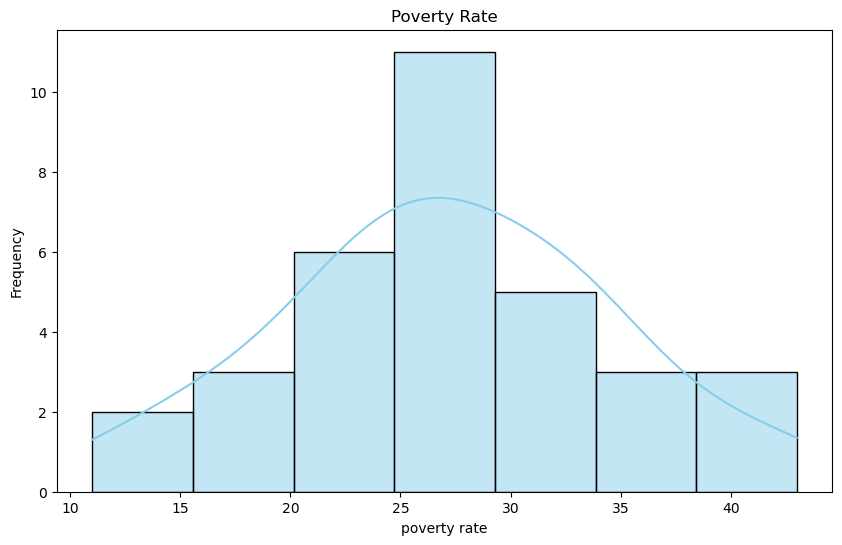

In [142]:
# Display the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(imputed_df['PovertyRate'], kde=True, color='skyblue')
plt.title('Poverty Rate')
plt.xlabel('poverty rate')
plt.ylabel('Frequency')
plt.show()

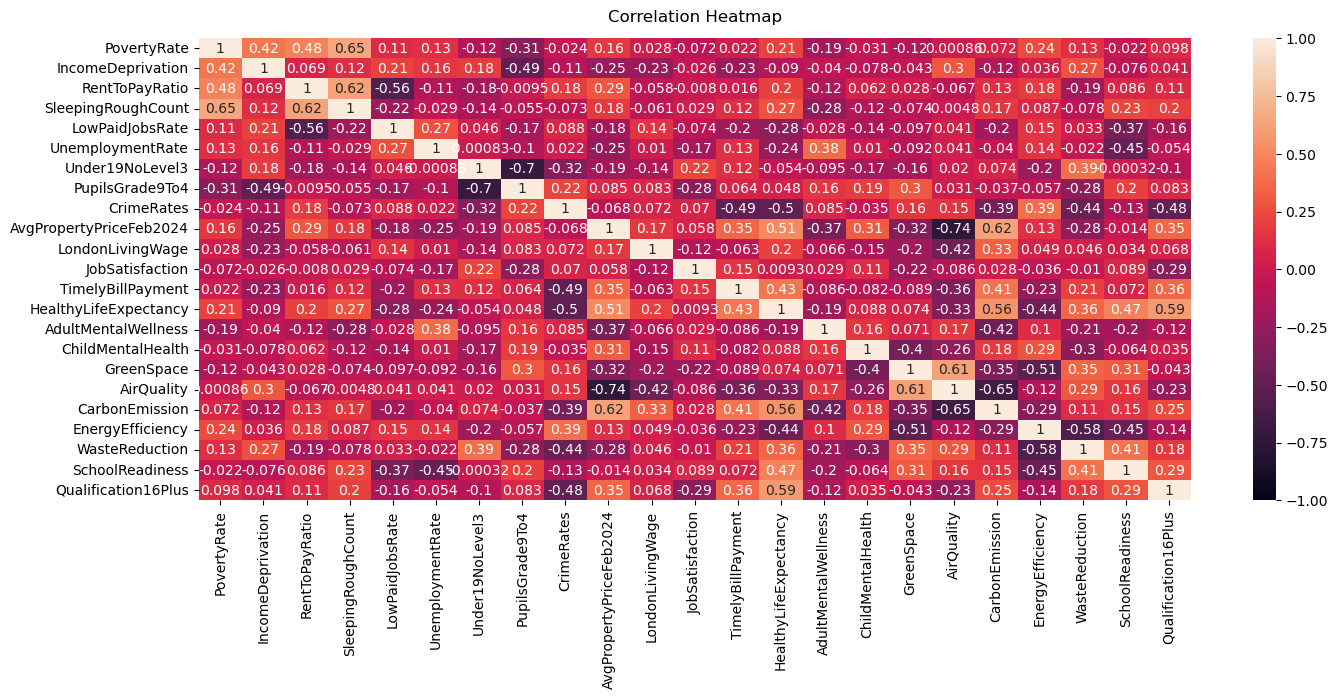

In [143]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imputed_df.corr(), vmin=-1,vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Strong Positive Correlations:

Child Poverty Rate and Income Deprivation Score: With a correlation of 0.82, areas with high child poverty rates also tend to have high income deprivation scores.

Child Poverty Rate and Out of Work Benefits: The correlation of 0.7 indicates that areas with more child poverty also have higher reliance on out of work benefits.

Income Deprivation Score and Out of Work Benefits: A correlation of 0.87 suggests a strong relationship between income deprivation and the need for out of work benefits.

Strong Negative Correlations:

No Qualifications Proportion and Pupils Intelligence: A correlation of -0.69 indicates that areas with higher proportions of individuals with no qualifications tend to have lower average scores in assessments of pupils' intelligence.

Moderate to Strong Correlations:

Early Death Rate and Child Poverty Rate: A correlation of 0.83 suggests that higher rates of child poverty are associated with higher early death rates in the area.

Early Death Rate and Income Deprivation Score: Similarly, a correlation of 0.83 indicates that areas with high income deprivation scores also have higher rates of early deaths.

Rough Sleepers Count and Poverty Rate: A correlation of 0.65 shows that areas with higher poverty rates tend to have more rough sleepers.

Interesting Observations:

Housing Completions and Repossessions per 1000: The positive correlation of 0.59 implies that areas with more housing completions also have higher rates of repossessions, which could suggest rapid housing development alongside financial instability for some residents.

Unemployment Rate and Unemployment Rate Change: Negative correlation of -0.29 indicates that areas with currently higher unemployment rates have seen a decline in unemployment over the last year (assuming 'change' is measured as a reduction).
Other Observations:

Some correlations are less intuitive or might seem counterintuitive, such as the low or negative correlations between measures of poverty/deprivation and some health or educational outcomes. This could suggest complex dynamics or the influence of mitigating factors like government programs or community initiatives.

In [144]:
imputed_df.drop(['Under19NoLevel3','RentToPayRatio', 'SleepingRoughCount','IncomeDeprivation','LowPaidJobsRate','JobSatisfaction', 'TimelyBillPayment'], axis=1, inplace=True)

In [145]:
imputed_df

,PovertyRate,UnemploymentRate,PupilsGrade9To4,CrimeRates,AvgPropertyPriceFeb2024,LondonLivingWage,HealthyLifeExpectancy,AdultMentalWellness,ChildMentalHealth,GreenSpace,AirQuality,CarbonEmission,EnergyEfficiency,WasteReduction,SchoolReadiness,Qualification16Plus
Area,,,,,,,,,,,,,,,,
Barking and Dagenham,29.000000,6.800000,66.0,123.0,328226.0,84.800000,59.13,0.65,16693.70,0.38,0.25,10.49,0.62,0.27,62.5,49.300000
Barnet,26.000000,5.400000,80.1,91.0,583647.0,86.300000,64.99,0.60,27921.07,0.52,0.25,11.36,0.57,0.29,64.9,58.100000
Bexley,26.000000,4.900000,69.4,84.0,391250.0,82.800000,65.17,0.62,31506.15,0.37,0.25,11.14,0.51,0.50,69.2,52.300000
Brent,32.000000,5.700000,68.0,114.0,521609.0,86.000000,65.58,0.57,26653.12,0.39,0.25,10.11,0.60,0.33,65.7,52.400000
Bromley,17.000000,5.000000,73.2,88.0,505297.0,86.000000,67.53,0.55,19268.83,0.49,0.25,12.08,0.47,0.45,71.9,53.900000
Camden,41.000000,4.900000,67.9,109.0,858206.0,74.900000,65.68,0.50,26736.21,0.44,0.25,11.07,0.63,0.29,65.3,52.400000
City of London,26.000000,5.300000,64.5,29.0,808976.0,87.400000,66.53,0.52,36527.11,0.07,0.24,13.98,0.61,0.30,66.7,55.933333
Croydon,34.000000,4.900000,73.7,109.0,394025.0,89.000000,62.83,0.56,15564.18,0.47,0.25,11.53,0.55,0.41,67.4,47.600000
Ealing,33.000000,5.600000,65.7,105.0,533943.0,84.200000,63.34,0.57,20522.10,0.41,0.25,10.55,0.63,0.49,68.0,53.700000


In [152]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_df)

scaled_data

array([[-1.30221596e+00, -1.34043448e+00, -6.77763732e-01,
        -5.58410255e-01, -9.53861479e-01,  2.25089135e-04,
        -1.24690038e+00, -1.07869005e+00, -6.31855495e-01,
         1.68304464e+00, -6.51621474e-01,  5.79506271e-01,
        -1.21088058e+00,  5.41470896e-01,  3.81318686e-01,
        -1.32524868e-01],
       [ 1.62075946e-01,  2.96969227e-01,  5.82785927e-01,
         6.12327171e-01,  1.57173361e+00, -4.55800665e-02,
        -1.10162700e+00, -1.92139624e+00,  2.45539424e-01,
        -4.55911515e-02,  8.77626799e-01, -1.25622670e+00,
        -1.39841789e+00, -1.42568590e+00, -1.30393786e+00,
         1.43982178e-01],
       [-9.40216793e-01,  1.33854372e+00,  9.67144417e-01,
        -1.43944716e-01, -7.90150511e-02, -6.15597002e-02,
         3.83688190e-01,  5.62842954e-01,  4.40912678e-01,
        -2.04927403e-01,  4.25270364e-01, -8.84037293e-01,
         8.47847190e-01,  2.61532327e+00,  4.39465457e-01,
         1.75812319e-01],
       [-1.93495201e-01,  1.74898469e

In [162]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
imputed_df = pca.fit_transform(imputed_df)

imputed_df

array([[-2.27238248e+05, -7.09503780e+03],
       [ 2.82824471e+04,  1.57188429e+03],
       [-1.64068959e+05,  7.08502985e+03],
       [-3.37651450e+04,  9.25753007e+02],
       [-5.01503326e+04, -6.29467929e+03],
       [ 3.02815783e+05, -2.36461203e+03],
       [ 2.53686382e+05,  7.91919415e+03],
       [-1.61453873e+05, -8.88395285e+03],
       [-2.14932109e+04, -5.32857276e+03],
       [-1.29893711e+05,  2.64816429e+03],
       [-9.63734271e+04,  9.29340899e+03],
       [ 3.41903199e+04,  5.32121086e+03],
       [ 1.89792560e+05,  4.16627919e+03],
       [ 1.21056854e+03,  2.21860254e+03],
       [-3.39663319e+04,  1.09873436e+02],
       [-1.35278533e+05,  5.48669561e+03],
       [-1.05744448e+05, -8.22270072e+03],
       [-1.10139082e+05,  2.17255528e+02],
       [ 8.98362297e+04,  7.92689571e+03],
       [ 5.99288179e+05,  8.05680903e+01],
       [-7.57421586e+03, -7.49419022e+03],
       [-5.43490058e+04, -5.84188193e+03],
       [-1.36474127e+05, -1.25173178e+03],
       [-1.

In [163]:
# K-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(imputed_df)

c:\Users\Jamie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [164]:
clusters

array([1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2])

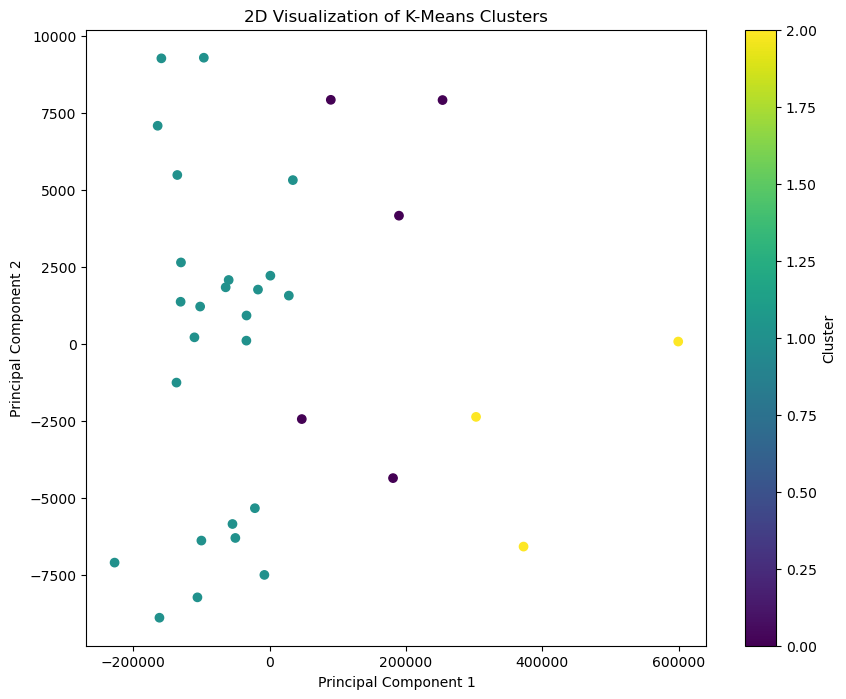

In [167]:
plt.figure(figsize=(10, 8))
plt.scatter(imputed_df[:, 0], imputed_df[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of K-Means Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
user_preference = [27, 5,	PupilsGrade9To4	CrimeRates	AvgPropertyPriceFeb2024	LondonLivingWage	HealthyLifeExpectancy	AdultMentalWellness	ChildMentalHealth	GreenSpace	AirQuality	CarbonEmission	EnergyEfficiency	WasteReduction	SchoolReadiness	Qualification16Plus]

In [179]:
# Scale the random user preferences
random_preferences_scaled = scaler.transform(random_preferences_matrix)
random_preferences_scaled

# Get recommendations
"""for i, prefs in enumerate(random_preferences_scaled, start=1):
    distances, indices = knn.kneighbors([prefs])
    recommended_boroughs = df['Area'].iloc[indices[0]].tolist()
    print(f"Recommended Boroughs for User {i}: {recommended_boroughs}")"""

ValueError: X has 23 features, but StandardScaler is expecting 16 features as input.